In [15]:
import os
import json
import matplotlib.pyplot as plt

In [20]:
# Collect organizations and their co-occurences

orgs = []
texts = []
years = []
occurences = []

dir = 'data/carbon_neutrality/'
files = os.listdir(dir)

for index, filename in enumerate(files):

    print(index, filename)
    
    f = open(dir + filename)
    r = f.read()
    parsed = json.loads(r)
    
    # Set tags and remove excessive values

    try:
        # Set tags
        tags = parsed[0]['story_tags']
        
        # Set max
        if len(tags) > 1000: continue
        
        # Set year
        year = int(parsed[0]['publish_date'].split(' ')[0].split('-')[0])
    
    except:
        continue


    # Collect organizations' names
    
    _names = []

    for tag in tags:
        if (tag['tag_set'] == 'cliff_organizations'):
            
            label = tag['tag']
            label = label.replace('.', '')
            
            if label.startswith('U.S. '): label = label.replace('U.S. ', '')
            if label.startswith('US '): label = label.replace('US ', '')
            
            if label == 'EU': label = 'European Union'
            # if label == 'E.U.': label = 'European Union'
            if label == 'IEA': label = 'International Energy Agency'
            if label == 'Exxon': label = 'ExxonMobil'
            if label == 'Exxon Mobil': label = 'ExxonMobil'
            if label == 'ExonnMobil': label = 'ExxonMobil'
            if label == 'US Energy Information Administration': label = 'Energy Information Administration'
            if label == 'Massachusetts Institute of Technology': label = 'MIT'
            # if label == 'U.N.': label = 'United Nations'
            if label == 'UN': label = 'United Nations'
            if label == 'EDF': label = 'Environmental Defense Fund'
            if label == 'Interior': label = 'Interior Department'
            if label == 'EIA': label = 'Energy Information Administration'
            if label == 'AP': label = 'Associated Press'
            if label == 'NOAA': label = 'National Oceanic and Atmospheric Administration'
            if label == 'US Forest Service': label = 'Forest Service'
            if label == 'US Department of Energy': label = 'Energy Department'
            if label == 'Energy Department': label = 'Department of Energy'
            if label == 'DOE': label = 'Department of Energy'
            if label == 'Energy': label = 'Department of Energy'
            if label == 'Agriculture': label = 'Department of Agriculture'
            if label == 'GE': label = 'General Electric'
            if label == 'Stanford': label = 'Stanford University'
            if label == 'NRDC': label = 'Natural Resources Defense Council'
            if label == 'EPA': label = 'Environmental Protection Agency'
            if label == 'Harvard': label = 'Harvard University'
            if label == 'house': label = 'House'
            if label == 'FDA': label = 'Food and Drug Administration'
            if label == 'GOP': label = 'Republican Party'
            if label == 'PG&E': label = 'Pacific Gas & Electric Co'
            if label == 'Xcel': label = 'Xcel Energy'
            if label == 'Penn State': label = 'Pennsylvania State University'
            if label == 'El Nino': label = 'El Niño'
            if label == 'SEC': label = 'Securities and Exchange Commission'
            if label == 'Sierra': label = 'Sierra Club'
            if label == 'PUC': label = 'Public Utilities Commission'

            stoplist = {'Elon Musk', 'Trump', 'CCS', 'green energy', 'clean energy'}
            
            if label not in stoplist:
                _names.append(label)

    # Collect by name

    # x -> years
    # y -> occurencies

    for n in _names:
        if n in orgs:
            
            index = orgs.index(n)
            texts[index] = texts[index] + _names
            occurences[index] += 1
            
            if year in years[index]:
                years[index][year] += 1
            else:
                years[index][year] = 1
                
        else:
            orgs.append(n)
            texts.append(_names)
            occurences.append(1)
            years.append({year: 1})


# Clean less citates organizations

for index, occurrence in reversed(list(enumerate(occurences))):

    min = 30

    if occurrence < min:
        orgs.pop(index)
        texts.pop(index)
        years.pop(index)
        occurences.pop(index)
    # else:
        # print()
        # print(index, occurrence, orgs[index])
        # print()

# order years by key in an array of tuples

for index, y in enumerate(years):
    sortedDict = dict( sorted(y.items(), key=lambda x: x[0]) )
    _temp = {}
    for k,v in sortedDict.items():
        _temp[k] = v
    years[index] = _temp

print(len(orgs), len(texts), len(years), len(occurences))

# print(occurences[0])
# print(years[0][:, 0])



on
3210 1889227043.json
3211 1900153603.json
3212 741181644.json
3213 1647790239.json
3214 1720679677.json
3215 1898174815.json
3216 1801186087.json
3217 1800614286.json
3218 1399277054.json
3219 1909684195.json
3220 1835959549.json
3221 1765404297.json
3222 1225538988.json
3223 1796210680.json
3224 1915874930.json
3225 1384570615.json
3226 1524970422.json
3227 1866694655.json
3228 1910821290.json
3229 1397116205.json
3230 1800200043.json
3231 1542435364.json
3232 1643465707.json
3233 1775013071.json
3234 1828906875.json
3235 1625403003.json
3236 1871003636.json
3237 1811782845.json
3238 1797112881.json
3239 1777858682.json
3240 1233173018.json
3241 1795798108.json
3242 1902229493.json
3243 1903381720.json
3244 1400234664.json
3245 1719684506.json
3246 1821161938.json
3247 1730372695.json
3248 1788047827.json
3249 1752225928.json
3250 1909879841.json
3251 1777058802.json
3252 1796553524.json
3253 1760945702.json
3254 1795389198.json
3255 1668878689.json
3256 1765480290.json
3257 174301

In [21]:
# Linear regression

import numpy as np
from sklearn.linear_model import LinearRegression

slopes = []
colors = []

for year in years:

    y = list(year.values())
    x = list(year.keys())

    print()
    print(x, y)

    x = np.array(x).reshape((-1, 1))
    
    model = LinearRegression().fit(x, y)
    slope = model.coef_
    score = model.score(x, y)
    print('slope', slope)
    print('score', score)

    slopes.append(slope)

    # Test with a gradient

    if slope > 0:
        colors.append('red')
    else:
        colors.append('blue')

    # if slope > .5:
    #     colors.append('red')
    # else:
    #     if slope > -.5:
    #         colors.append('orange')
    #     else:
    #         colors.append('blue')



# x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
# y = np.array([5, 20, 14, 32, 22, 38])


[2015, 2016, 2018, 2019, 2020, 2021] [1, 4, 8, 174, 491, 206]
slope [60.21118012]
score 0.5297636025480843

[2019, 2020, 2021] [11, 10, 11]
slope [6.13513107e-17]
score 0.0

[2016, 2019, 2020, 2021] [1, 15, 36, 21]
slope [5.35714286]
score 0.636996772549679

[2018, 2019, 2020, 2021] [1, 71, 88, 30]
slope [10.4]
score 0.11602660373310103

[2011, 2013, 2015, 2016, 2018, 2019, 2020, 2021] [3, 1, 3, 7, 8, 317, 568, 301]
slope [46.20669578]
score 0.5531899445750774

[2019, 2020, 2021] [29, 15, 15]
slope [-7.]
score 0.75

[2019, 2020, 2021] [3, 21, 17]
slope [7.]
score 0.5485074626865671

[2019, 2020, 2021] [11, 57, 3]
slope [-4.]
score 0.01883830455259028

[2015, 2018, 2019, 2020, 2021] [1, 1, 15, 30, 14]
slope [3.6509434]
score 0.48822221642696007

[2011, 2015, 2017, 2018, 2019, 2020, 2021] [1, 1, 1, 2, 66, 120, 104]
slope [11.77777778]
score 0.5616689439130791

[2015, 2016, 2018, 2019, 2020, 2021] [1, 1, 2, 43, 37, 14]
slope [5.13043478]
score 0.38821355170708016

[2011, 2019, 2020, 2021

In [22]:
# Term Frequency Matrix

import textacy

doc_term_matrix, dictionary = textacy.representations.build_doc_term_matrix(texts, tf_type="linear", idf_type="smooth")

 * creating mesh with size 28 28
 * filling mesh


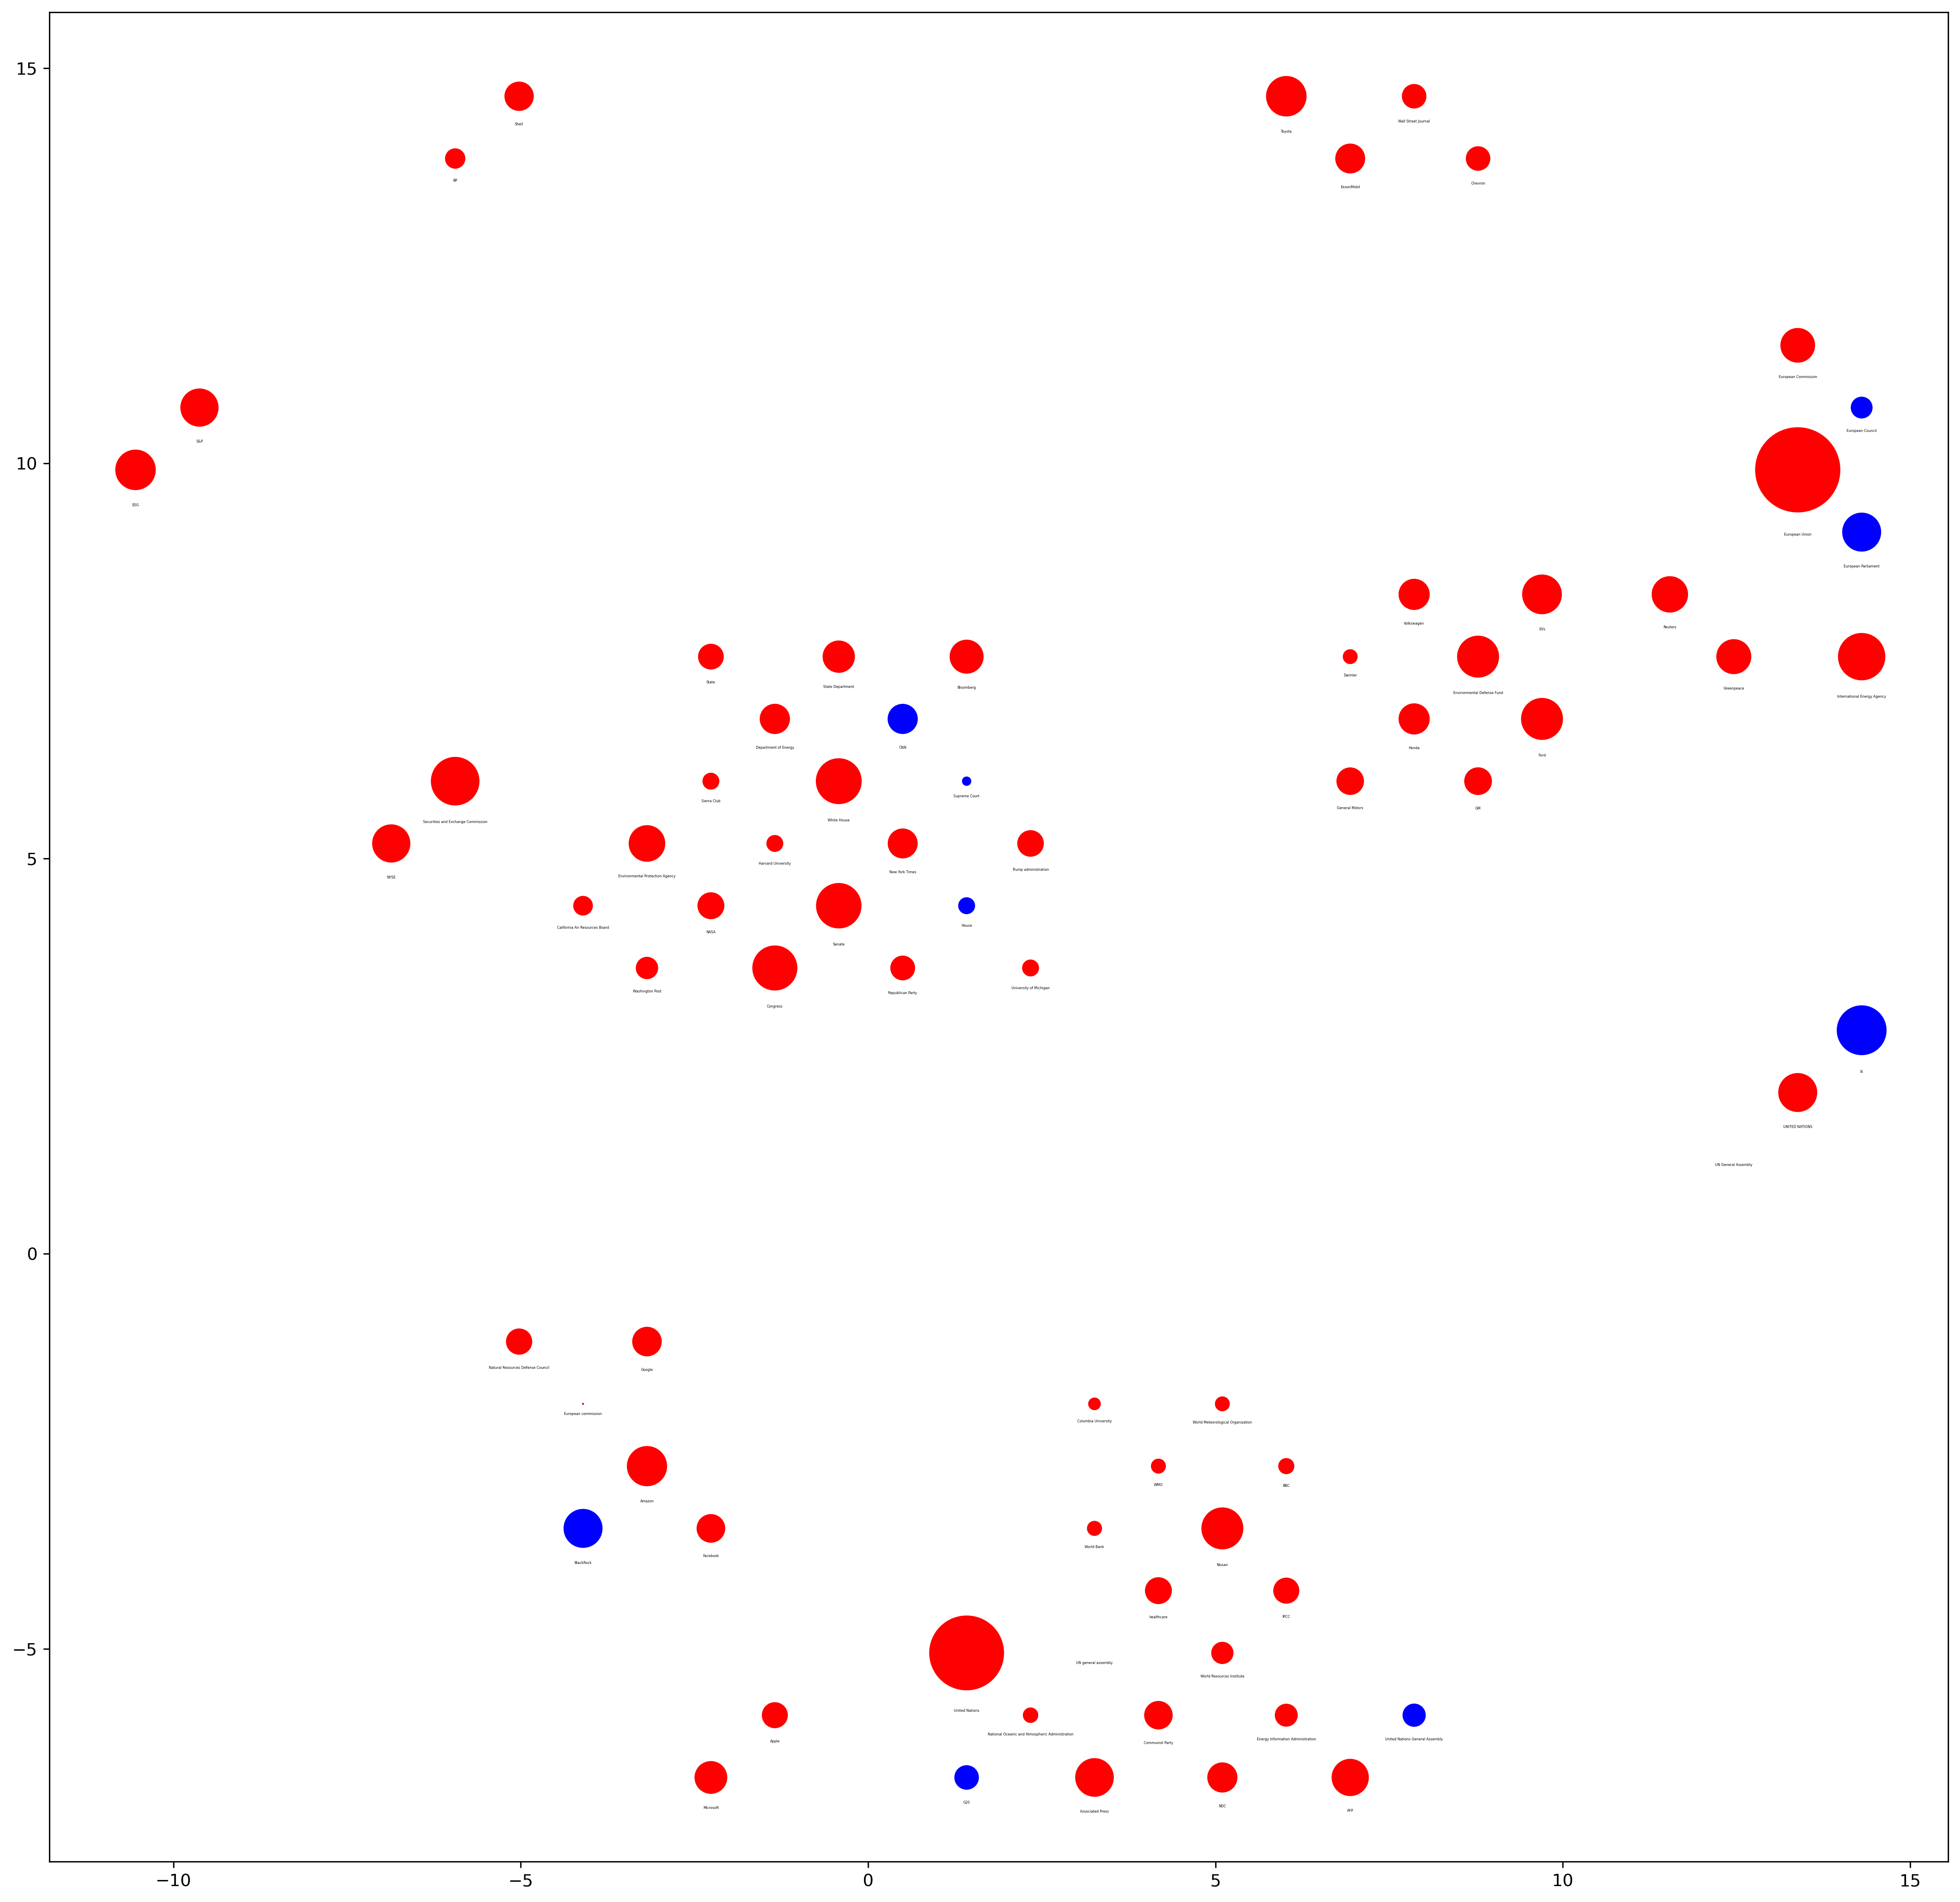

In [23]:
# UMAP

import umap
import math
import matplotlib.pyplot as plt
from pointgrid import align_points_to_grid


reducer = umap.UMAP(n_components=2, n_neighbors=2, min_dist=0.01, metric='cosine')
# reducer = umap.UMAP(random_state=2, n_components=2, n_neighbors=2, min_dist=0.01, metric='hellinger')

embedding = reducer.fit_transform(doc_term_matrix)
embedding = align_points_to_grid(embedding)

x = embedding[:, 0]; y = embedding[:, 1]

for index, s in enumerate(slopes):
    slopes[index] = abs(s)*40

plt.figure(figsize=(20,20), dpi=300)
# plt.scatter(x, y, s=occurences, c=colors)
plt.scatter(x, y, s=slopes, c=colors)

for i, txt in enumerate(orgs):
    text = plt.annotate(orgs[i], xy=(x[i], y[i] - math.sqrt(slopes[i]/math.pi)/40 - .15), ha='center', va='bottom')
    text.set_fontsize(2)

plt.savefig('/Users/dario/Desktop/download.png')
plt.savefig('download.png')